In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import pydataset as data

import acquire
import prepare as prep

from env import get_db_url

α = .05

# Data Acquisition Exercises

## 1- 3 : Creating Repository, modifying and including .gitignore. 

## 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
# Importing Iris dataset and creating a DataFrame:

sns.load_dataset('iris')

df_iris = pd.DataFrame(sns.load_dataset('iris'))

### a. print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### b. print the number of rows and columns (shape)

In [4]:
df_iris.shape

#150 Rows, 5 Columns

(150, 5)

### c. Print the column names

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### d. print the data type of each column

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### e. print the summary statistics for each of the numeric variables

In [7]:
df_iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [8]:
df_iris.sepal_width.describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [9]:
df_iris.petal_length.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [10]:
df_iris.petal_width.describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

## 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [11]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1adWbq9gXVUsjV5NuAfOM7yFpU5AbRoNC4uKPm5r-xJI/edit#gid=1825007169'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_charges,average_charge_true,phone_service_type,service_type,rounded_tenure
0,5893-KCLGT,Female,0,No,Yes,1,0,2,Mailed check,19.75,...,False,True,False,False,2,19.8,True,One Line,Phone,79
1,7083-MIOPC,Female,0,No,No,1,0,2,Credit card (automatic),20.25,...,False,True,False,False,0,20.3,True,One Line,Phone,77
2,8207-VVMYB,Female,0,Yes,No,2,0,2,Bank transfer (automatic),26.00,...,False,True,False,False,1,26.0,True,Two or More Lines,Phone,77
3,6010-DDPPW,Male,0,Yes,No,2,0,2,Bank transfer (automatic),25.15,...,False,True,False,False,1,25.2,True,Two or More Lines,Phone,77
4,3910-MRQOY,Female,0,Yes,No,1,0,2,Bank transfer (automatic),19.40,...,False,True,False,False,1,19.4,True,One Line,Phone,77


### a. Assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [12]:
df_google_sheets_sample = df_googlesheet.head(100)
#df_google_sheets_sample

### b. print the number of rows of your original dataframe

In [13]:
df_googlesheet.shape[0]

7038

### c. Print the first 5 column names

In [14]:
df_googlesheet.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### d. Print the column names that have a data type of object

In [15]:
df_googlesheet.select_dtypes(include = 'object')

,customer_id,gender,partner,dependents,payment_type,churn,phone_service_type,service_type
0,5893-KCLGT,Female,No,Yes,Mailed check,No,One Line,Phone
1,7083-MIOPC,Female,No,No,Credit card (automatic),No,One Line,Phone
2,8207-VVMYB,Female,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
3,6010-DDPPW,Male,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
4,3910-MRQOY,Female,Yes,No,Bank transfer (automatic),No,One Line,Phone
...,...,...,...,...,...,...,...,...
7033,1423-BMPBQ,Female,Yes,Yes,Mailed check,No,One Line,Phone
7034,9975-SKRNR,Male,No,No,Mailed check,No,One Line,Phone
7035,8992-CEUEN,Female,No,No,Electronic check,No,One Line,Phone
7036,9318-NKNFC,Male,No,No,Mailed check,Yes,One Line,Phone


### e. Compute the range for each of the numeric variables.

In [16]:
df_googlesheet.select_dtypes(include = 'number')

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,average_charges,rounded_tenure
0,0,1,0,2,19.75,1567.00,79.3,2,19.8,79
1,0,1,0,2,20.25,1566.90,77.4,0,20.3,77
2,0,2,0,2,26.00,2006.95,77.2,1,26.0,77
3,0,2,0,2,25.15,1940.85,77.2,1,25.2,77
4,0,1,0,2,19.40,1496.45,77.1,1,19.4,77
...,...,...,...,...,...,...,...,...,...,...
7033,0,1,0,0,19.00,19.00,1.0,3,19.0,1
7034,0,1,0,0,18.90,18.90,1.0,0,18.9,1
7035,0,1,0,0,18.85,18.85,1.0,0,18.9,1
7036,0,1,0,0,18.85,18.85,1.0,0,18.9,1


In [17]:
# Ryan's Solution:
stats = df_googlesheet.describe().T

stats['range'] = stats['max'] - stats['min']
stats

#This prints out the stats, including a column for the range for all of the subgroups. SO much better than manually typing them out like I did. 

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7038.0,0.162262,0.368717,0.00,0.0000,0.00,0.0000,1.00,1.0
phone_service,7038.0,1.324808,0.642563,0.00,1.0000,1.00,2.0000,2.00,2.0
internet_service,7038.0,1.223785,0.778836,0.00,1.0000,1.00,2.0000,2.00,2.0
contract_type,7038.0,0.688974,0.832938,0.00,0.0000,0.00,1.0000,2.00,2.0
monthly_charges,7038.0,64.783475,30.095424,18.25,35.5125,70.35,89.8875,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.7750,8684.80,8666.0
tenure,7038.0,32.430676,24.580775,1.00,8.8000,28.80,55.3000,79.30,78.3
partner_dependents,7038.0,1.080705,1.225827,0.00,0.0000,1.00,2.0000,3.00,3.0
average_charges,7038.0,64.808468,30.095169,18.30,35.5250,70.40,89.9000,118.80,100.5
rounded_tenure,7038.0,31.976130,24.528766,1.00,8.0000,28.00,55.0000,79.00,78.0


In [18]:
# Monthly Charges:
df_googlesheet.monthly_charges.max() - df_googlesheet.monthly_charges.min()

100.5

In [19]:
# Total Charges:
df_googlesheet.total_charges.max() - df_googlesheet.total_charges.min()

8666.0

In [20]:
# Tenure:
df_googlesheet.tenure.max() - df_googlesheet.tenure.min()

78.3

In [21]:
# Average Charges (total charges over tenure):
df_googlesheet.average_charges.max() - df_googlesheet.average_charges.min()

100.5

## 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [22]:
df_excel = pd.read_excel('spreadsheet_exercises_workbook', sheet_name = 'Table1_CustDetails_COPY')

### a. Assign the first 100 rows to a new dataframe, df_excel_sample:

In [23]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_charges,average_charge_true,phone_service_type,service_type,rounded_tenure
0,5893-KCLGT,Female,0.0,No,Yes,1.0,0.0,2.0,Mailed check,19.75,...,False,True,False,False,2,19.75,True,One Line,Phone,79.0
1,7083-MIOPC,Female,0.0,No,No,1.0,0.0,2.0,Credit card (automatic),20.25,...,False,True,False,False,0,20.25,True,One Line,Phone,77.0
2,8207-VVMYB,Female,0.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),26.00,...,False,True,False,False,1,26.00,True,Two or More Lines,Phone,77.0
3,6010-DDPPW,Male,0.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),25.15,...,False,True,False,False,1,25.15,True,Two or More Lines,Phone,77.0
4,3910-MRQOY,Female,0.0,Yes,No,1.0,0.0,2.0,Bank transfer (automatic),19.40,...,False,True,False,False,1,19.40,True,One Line,Phone,77.0
5,0784-ZQJZX,Male,0.0,No,Yes,1.0,0.0,2.0,Credit card (automatic),19.90,...,False,True,False,False,2,19.90,True,One Line,Phone,76.0
6,3836-FZSDJ,Male,1.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),24.85,...,False,True,False,False,1,24.85,True,Two or More Lines,Phone,76.0
7,4625-XMOYM,Female,0.0,Yes,Yes,2.0,0.0,2.0,Bank transfer (automatic),26.25,...,False,True,False,False,3,26.25,True,Two or More Lines,Phone,75.0
8,8749-TZYEC,Male,0.0,Yes,No,2.0,0.0,2.0,Credit card (automatic),24.80,...,False,True,False,False,1,24.80,True,Two or More Lines,Phone,75.0
9,2452-MRMZF,Female,1.0,Yes,No,2.0,0.0,2.0,Credit card (automatic),25.70,...,False,True,False,False,1,25.70,True,Two or More Lines,Phone,75.0


### b. Print the number of rows of your original dataframe

In [24]:
df_excel.shape[0]

7038

### c. Print the first 5 column names

In [25]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### d. Print the column names that have a data type of object

In [26]:
df_excel.select_dtypes(include = 'object')

,customer_id,gender,partner,dependents,payment_type,churn,phone_service_type,service_type
0,5893-KCLGT,Female,No,Yes,Mailed check,No,One Line,Phone
1,7083-MIOPC,Female,No,No,Credit card (automatic),No,One Line,Phone
2,8207-VVMYB,Female,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
3,6010-DDPPW,Male,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
4,3910-MRQOY,Female,Yes,No,Bank transfer (automatic),No,One Line,Phone
...,...,...,...,...,...,...,...,...
7033,1423-BMPBQ,Female,Yes,Yes,Mailed check,No,One Line,Phone
7034,9975-SKRNR,Male,No,No,Mailed check,No,One Line,Phone
7035,8992-CEUEN,Female,No,No,Electronic check,No,One Line,Phone
7036,9318-NKNFC,Male,No,No,Mailed check,Yes,One Line,Phone


### e. Compute the range for each of the numeric variables.

In [27]:
# Ryan's Solution:
excel_stats = df_excel.describe().T

excel_stats['range'] = excel_stats['max'] - excel_stats['min']
excel_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7038.0,0.162262,0.368717,0.00,0.00000,0.000000,0.000000,1.000000,1.000000
phone_service,7038.0,1.324808,0.642563,0.00,1.00000,1.000000,2.000000,2.000000,2.000000
internet_service,7038.0,1.223785,0.778836,0.00,1.00000,1.000000,2.000000,2.000000,2.000000
contract_type,7038.0,0.688974,0.832938,0.00,0.00000,0.000000,1.000000,2.000000,2.000000
monthly_charges,7038.0,64.783475,30.095424,18.25,35.51250,70.350000,89.887500,118.750000,100.500000
total_charges,7038.0,2283.043883,2266.521984,18.80,401.58750,1397.100000,3793.775000,8684.800000,8666.000000
tenure,7038.0,32.430474,24.581374,1.00,8.80658,28.841472,55.267508,79.341772,78.341772
partner_dependents,7038.0,1.080705,1.225827,0.00,0.00000,1.000000,2.000000,3.000000,3.000000
average_charges,7038.0,64.783475,30.095424,18.25,35.51250,70.350000,89.887500,118.750000,100.500000
rounded_tenure,7038.0,31.976130,24.528766,1.00,8.00000,28.000000,55.000000,79.000000,78.000000


In [28]:
df_excel.select_dtypes(include = 'number')

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,average_charges,rounded_tenure
0,0.0,1.0,0.0,2.0,19.75,1567.00,79.341772,2,19.75,79.0
1,0.0,1.0,0.0,2.0,20.25,1566.90,77.377778,0,20.25,77.0
2,0.0,2.0,0.0,2.0,26.00,2006.95,77.190385,1,26.00,77.0
3,0.0,2.0,0.0,2.0,25.15,1940.85,77.170974,1,25.15,77.0
4,0.0,1.0,0.0,2.0,19.40,1496.45,77.136598,1,19.40,77.0
...,...,...,...,...,...,...,...,...,...,...
7033,0.0,1.0,0.0,0.0,19.00,19.00,1.000000,3,19.00,1.0
7034,0.0,1.0,0.0,0.0,18.90,18.90,1.000000,0,18.90,1.0
7035,0.0,1.0,0.0,0.0,18.85,18.85,1.000000,0,18.85,1.0
7036,0.0,1.0,0.0,0.0,18.85,18.85,1.000000,0,18.85,1.0


In [29]:
#Monthly Charges
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

100.5

In [30]:
# Total Charges:
df_excel.total_charges.max() - df_excel.total_charges.min()

8666.0

In [31]:
# Tenure:
df_excel.tenure.max() - df_excel.tenure.min()

78.34177215

In [32]:
# Average Charges (total charges over tenure):
df_excel.average_charges.max() - df_excel.average_charges.min()

100.5

## 7. Read the data from [this Google Sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357) into a dataframe, df_google.

In [33]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### a. Print the first 3 rows:

In [34]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### b. Print the number of rows and columns

In [35]:
df_google.shape

(891, 12)

### c. Print the column names:

In [36]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
#You can add '.to_list()' to turn this output into a list that you can actually work with. 

df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### d. Print the data type of each column

In [38]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### e. Print the summary statistics for each of the numeric variables

In [39]:
# Age:
df_google.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
# SibSp (number of siblings or spouses on board):
df_google.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [41]:
# Parch (number of parents/children on board):
df_google.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [42]:
# Fare:
df_google.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### f. Print the unique values for each of your categorical variables:

In [43]:
# Survived:
df_google.Survived.unique()

array([0, 1])

In [44]:
# Pclass:
df_google.Pclass.unique()

array([3, 1, 2])

In [45]:
# Sex:
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [46]:
# Embarked (Whether the passenger embarked in Southampton, Cherbourg, or Queenstown - there are 2 nulls):
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

## acquire.py Exercises

### a. Exercise 1 for acquire.py

In [47]:
import acquire

titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### b. Exercise 2 for acquire.py

In [48]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


### c. Exercise 3 for acquire.py

In [49]:
telco_df = acquire.get_telco_data()
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


# Exploratory Analysis Exercises

## Exercises - Part I:
- Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [50]:
df = acquire.get_iris_data()
train, validate, test = prep.prep_iris_data(df)
train.head()

df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


In [51]:
train.shape, test.shape, validate.shape

((96, 7), (30, 7), (24, 7))

### 2. Univariate Stats

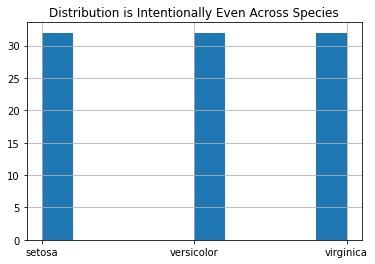

In [52]:
plt.title('Distribution is Intentionally Even Across Species')
train.species.hist()
plt.show()

In [53]:
train.dtypes

species                object
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_versicolor      uint8
species_virginica       uint8
dtype: object

In [54]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,5.833333,3.041667,3.739583,1.164583,0.333333,0.333333
std,0.860559,0.423933,1.795520,0.750576,0.473879,0.473879
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.775000,1.500000,0.200000,0.000000,0.000000
50%,5.700000,3.000000,4.200000,1.300000,0.000000,0.000000
75%,6.400000,3.325000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.200000,6.900000,2.400000,1.000000,1.000000


#### a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [55]:
train.sepal_length.describe()

count    96.000000
mean      5.833333
std       0.860559
min       4.300000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

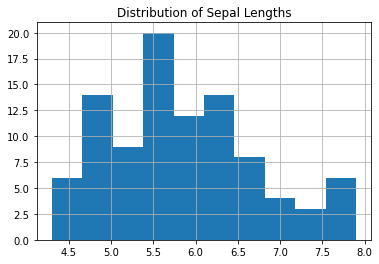

In [56]:
plt.title('Distribution of Sepal Lengths')
train.sepal_length.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Sepal Length By Species'}, xlabel='species', ylabel='sepal_length'>

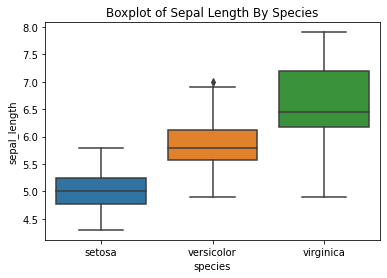

In [57]:
plt.title('Boxplot of Sepal Length By Species')
sns.boxplot(data = train, x = 'species', y = 'sepal_length')

In [58]:
train.sepal_width.describe()

count    96.000000
mean      3.041667
std       0.423933
min       2.000000
25%       2.775000
50%       3.000000
75%       3.325000
max       4.200000
Name: sepal_width, dtype: float64

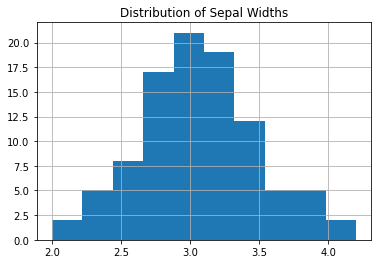

In [59]:
plt.title('Distribution of Sepal Widths')
train.sepal_width.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Sepal Width By Species'}, xlabel='species', ylabel='sepal_width'>

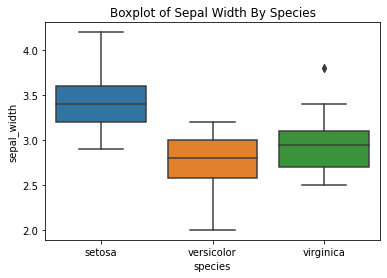

In [60]:
plt.title('Boxplot of Sepal Width By Species')
sns.boxplot(data = train, x = 'species', y = 'sepal_width')

In [61]:
train.petal_length.describe()

count    96.000000
mean      3.739583
std       1.795520
min       1.000000
25%       1.500000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

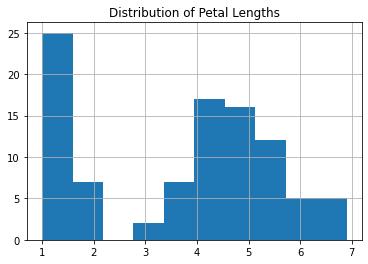

In [62]:
plt.title('Distribution of Petal Lengths')
train.petal_length.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Petal Length By Species'}, xlabel='species', ylabel='petal_length'>

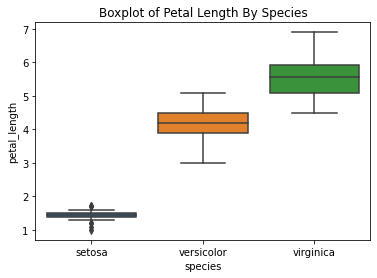

In [63]:
plt.title('Boxplot of Petal Length By Species')
sns.boxplot(data = train, x = 'species', y = 'petal_length')

In [64]:
train.petal_width.describe()

count    96.000000
mean      1.164583
std       0.750576
min       0.100000
25%       0.200000
50%       1.300000
75%       1.800000
max       2.400000
Name: petal_width, dtype: float64

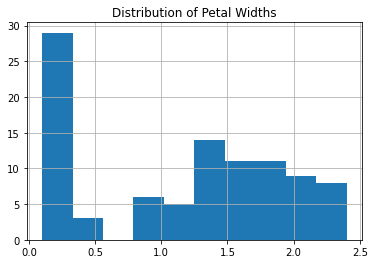

In [65]:
plt.title('Distribution of Petal Widths')
train.petal_width.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Petal Width By Species'}, xlabel='species', ylabel='petal_width'>

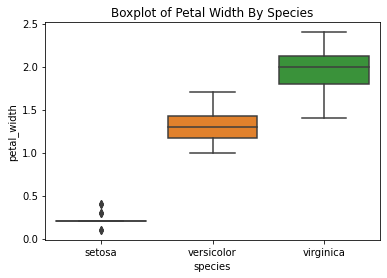

In [66]:
plt.title('Boxplot of Petal Width By Species')
sns.boxplot(data = train, x = 'species', y = 'petal_width')

#### b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

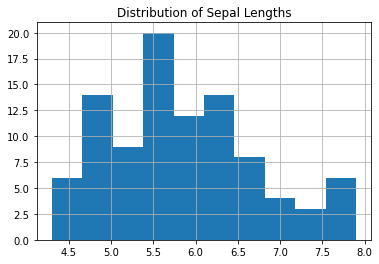

In [67]:
plt.title('Distribution of Sepal Lengths')
train.sepal_length.hist()
plt.show()

In [68]:
# How should I make a bar plot of these frequencies?

#### c. Document takeaways & any actions.

### 3. Bivariate Stats

#### a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [69]:
df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


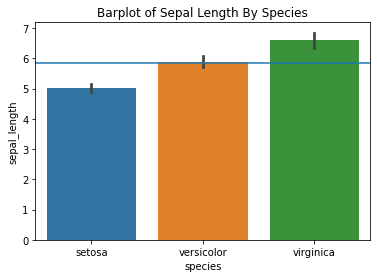

In [70]:
plt.title('Barplot of Sepal Length By Species')
sns.barplot(data = train, x = 'species', y = 'sepal_length')
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="mean_sepal_length")

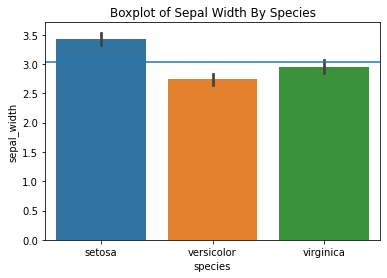

In [71]:
plt.title('Boxplot of Sepal Width By Species')
sns.barplot(data = train, x = 'species', y = 'sepal_width')
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="mean_sepal_width")

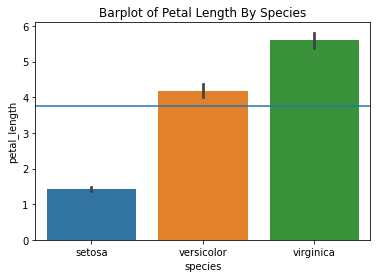

In [72]:
plt.title('Barplot of Petal Length By Species')
sns.barplot(data = train, x = 'species', y = 'petal_length')
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="mean_petal_length")

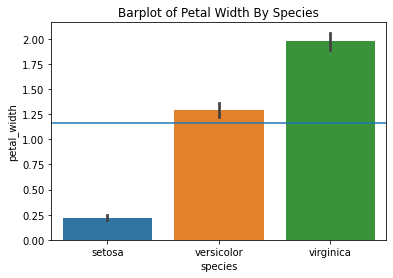

In [73]:
plt.title('Barplot of Petal Width By Species')
sns.barplot(data = train, x = 'species', y = 'petal_width')
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="mean_petal_width")

#### b. For each measurement type, compute the descriptive statistics for each species.

In [74]:
train.sepal_length.describe()

count    96.000000
mean      5.833333
std       0.860559
min       4.300000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [75]:
train.sepal_width.describe()

count    96.000000
mean      3.041667
std       0.423933
min       2.000000
25%       2.775000
50%       3.000000
75%       3.325000
max       4.200000
Name: sepal_width, dtype: float64

In [76]:
train.petal_length.describe()

count    96.000000
mean      3.739583
std       1.795520
min       1.000000
25%       1.500000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

In [77]:
train.petal_width.describe()

count    96.000000
mean      1.164583
std       0.750576
min       0.100000
25%       0.200000
50%       1.300000
75%       1.800000
max       2.400000
Name: petal_width, dtype: float64

#### c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [78]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
42,setosa,4.4,3.2,1.3,0.2,0,0
98,versicolor,5.1,2.5,3.0,1.1,1,0
35,setosa,5.0,3.2,1.2,0.2,0,0
139,virginica,6.9,3.1,5.4,2.1,0,1
77,versicolor,6.7,3.0,5.0,1.7,1,0


In [79]:
#Creating separate categories for the two species:
virginica_species = train[train.species == 'virginica']
versicolor_species = train[train.species == 'versicolor']

In [80]:
#Checking the variance of the two groups:
virginica_species.petal_width.var(), versicolor_species.petal_width.var()

(0.0649899193548387, 0.038024193548387104)

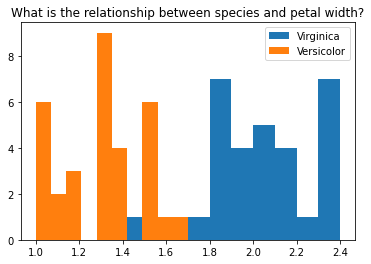

In [81]:
plt.title("What is the relationship between species and petal width?")
plt.hist(virginica_species.petal_width, label = 'Virginica')
plt.hist(versicolor_species.petal_width, label = 'Versicolor')
plt.legend()
plt.show()

In [82]:
from scipy.stats import mannwhitneyu

In [83]:
null_hypothesis = "Versicolor petal width is greater than or equal to Virginica petal width."
alternative_hypothesis = "Versicolor petal width is lower than Virginica petal width."

t, p = mannwhitneyu(versicolor_species.petal_width,virginica_species.petal_width, alternative = "less")
t, p

(17.0, 1.3065401833692795e-11)

In [84]:
if p < α:
    print("There is sufficient evidence to reject the null that ", null_hypothesis)
    print("There is sufficient evidence for us to continue with the assumption that ", alternative_hypothesis)
else:
    print("There is insufficient evidence to reject the null hypothesis.")
    print("There is no evidence evidence that ", alternative_hypothesis)

There is sufficient evidence to reject the null that  Versicolor petal width is greater than or equal to Virginica petal width.
There is sufficient evidence for us to continue with the assumption that  Versicolor petal width is lower than Virginica petal width.


#### d. Document takeaways & any actions.

### 3. Multivariate Stats

#### a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

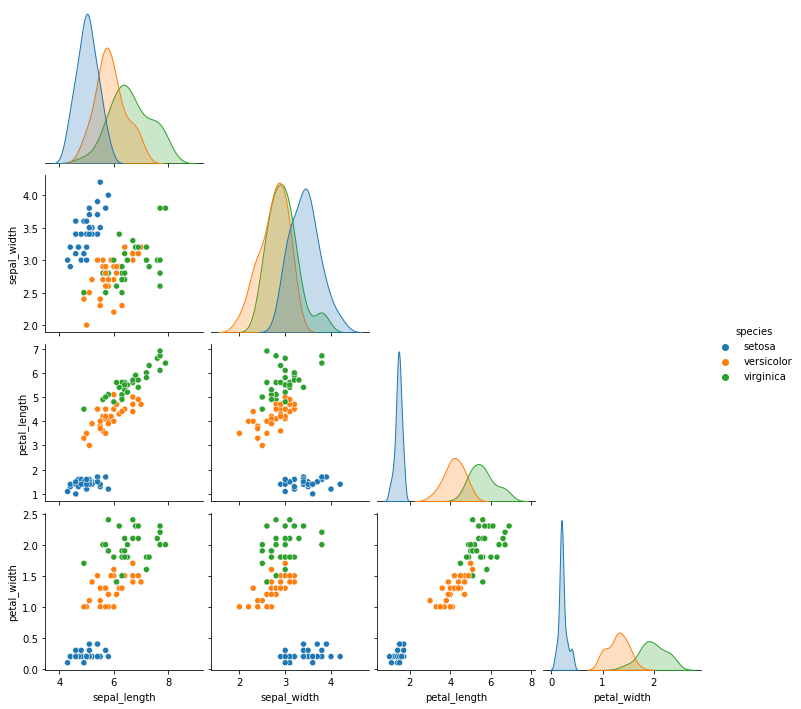

In [85]:
sns.pairplot(train, hue = "species", vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], corner = True)

#### b. Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

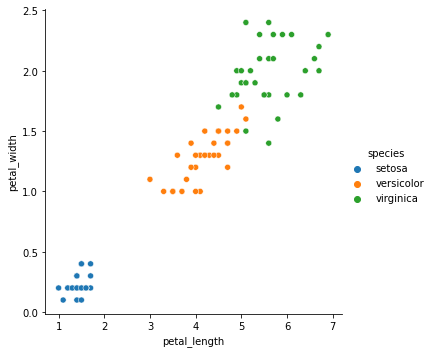

In [86]:
sns.relplot(data = train, x = 'petal_length', y = 'petal_width', hue = 'species')

#### c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [87]:
train

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
42,setosa,4.4,3.2,1.3,0.2,0,0
98,versicolor,5.1,2.5,3.0,1.1,1,0
35,setosa,5.0,3.2,1.2,0.2,0,0
139,virginica,6.9,3.1,5.4,2.1,0,1
77,versicolor,6.7,3.0,5.0,1.7,1,0
88,versicolor,5.6,3.0,4.1,1.3,1,0
60,versicolor,5.0,2.0,3.5,1.0,1,0
146,virginica,6.3,2.5,5.0,1.9,0,1
105,virginica,7.6,3.0,6.6,2.1,0,1
27,setosa,5.2,3.5,1.5,0.2,0,0


In [88]:
melted_iris = pd.melt(train.drop(columns = ['species_versicolor', 'species_virginica']), id_vars = 'species')
melted_iris

,species,variable,value
0,setosa,sepal_length,4.4
1,versicolor,sepal_length,5.1
2,setosa,sepal_length,5.0
3,virginica,sepal_length,6.9
4,versicolor,sepal_length,6.7
...,...,...,...
379,setosa,petal_width,0.2
380,virginica,petal_width,1.8
381,setosa,petal_width,0.2
382,virginica,petal_width,2.3


<AxesSubplot:xlabel='variable', ylabel='value'>

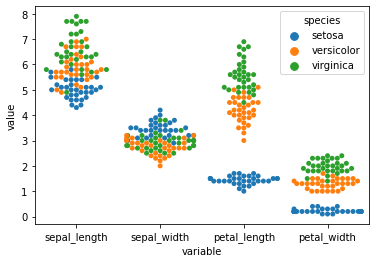

In [89]:
sns.swarmplot(data = melted_iris, x = 'variable', y = 'value', hue = 'species')

#### d. Ask a specific question of the data, such as: is the sepal area significantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [90]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
42,setosa,4.4,3.2,1.3,0.2,0,0
98,versicolor,5.1,2.5,3.0,1.1,1,0
35,setosa,5.0,3.2,1.2,0.2,0,0
139,virginica,6.9,3.1,5.4,2.1,0,1
77,versicolor,6.7,3.0,5.0,1.7,1,0


In [91]:
#Question:
#Is the petal area significantly different between virginica and setosa?

#Creating the petal_area column:
train['petal_area'] = (train.petal_length * train.petal_width)

In [92]:
#Creating separate categories for the two species:
virginica_species = train[train.species == 'virginica']
setosa_species = train[train.species == 'setosa']

In [93]:
#Checking variance of area by species to determine which test to use:
virginica_species.petal_area.var(), setosa_species.petal_area.var()

#The variances are different, so I'm going to check the distributions.

(4.656090322580645, 0.016336995967741935)

<AxesSubplot:xlabel='petal_area', ylabel='Count'>

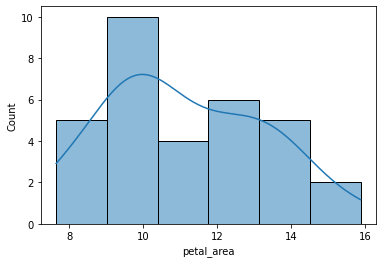

In [94]:
#Plotting histograms of each to see if they're normally distributed:
sns.histplot(data = virginica_species, x = 'petal_area', kde = True)
#virginica_species.petal_area.hist()

<AxesSubplot:xlabel='petal_area', ylabel='Count'>

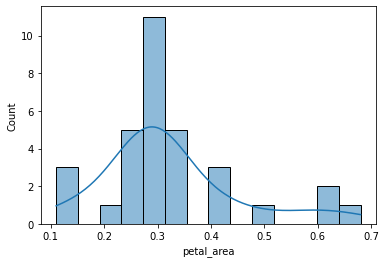

In [95]:
sns.histplot(data = setosa_species, x = 'petal_area', kde = True)
#setosa_species.petal_area.hist()

In [96]:
#They are not normally distributed and they have unequal variances, so I'll use the Mann-Whitney test:

null_hypothesis = "The area of setosa petals will be equal-to or larger than the area of virginica petals."
alternative_hypothesis = "The area of setosa petals will be less than the area of virginica petals."

t, p = mannwhitneyu(setosa_species.petal_area,virginica_species.petal_area, alternative = "less")
p

3.1184749929826906e-12

In [97]:
if p < α:
    print("There is sufficient evidence to reject the null that ", null_hypothesis)
    print("There is sufficient evidence for us to continue with the assumption that ", alternative_hypothesis)
else:
    print("There is insufficient evidence to reject the null hypothesis.")
    print("There is no evidence evidence that ", alternative_hypothesis)

There is sufficient evidence to reject the null that  The area of setosa petals will be equal-to or larger than the area of virginica petals.
There is sufficient evidence for us to continue with the assumption that  The area of setosa petals will be less than the area of virginica petals.


#### e. Document takeaways and any actions.

## Exercises - Part II:

### Explore your titanic dataset more completely.

In [98]:
#Acquired the dataset earlier:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### a. Determine drivers of the target variable.

In [99]:
titanic_df = prep.clean_titanic_data(titanic_df)
titanic_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


#### b. Determine if certain columns should be dropped.

As part of my clean_titanic_data function in my [prep.py module](https://github.com/greg-maggard/classification_exercises/blob/main/prepare.py), columns are automatically dropped.

#### c. Determine if it would be valuable to bin some numeric columns.

In [101]:
# I need to look into this further, but my initial thought is that there's not much value to be found in binning any of these numbers. Maybe fare prices?

#### d. Determine if it would be valuable to combine multiple columns into one.

In [102]:
# I don't think there's any value to be found in combining any of these columns, as they've already been split for more nuanced analysis. 

#### e. Does it make sense to combine any features?

In [103]:
# I don't believe so.

#### f. Do you find any surprises?

In [104]:
#I was surprised to find how stark the difference in survival was between genders.

In [105]:
#I also want to come back and do some analysis on survival by class. 

#### g. Document any and all findings and takeaways in your notebook using markdown.

## Exercises - Part III:

### <font color = 'red'> NOTE: <font> 

- I came back to these exercises later on to finish anything out that hadn't yet been completed. However, in lieu of repeating code in this notebook, here is a [notebook containing a lot of analysis of the Telco dataset](https://github.com/greg-maggard/telco_classification_project/blob/main/scratch_notes.ipynb), as part of my analysis for the [Telco Classification Project](https://github.com/greg-maggard/telco_classification_project).
- Questions answered in Markdown reflect findings of analysis during that project. 

### Explore your telco data to discover drivers of churn

#### a. Determine if certain columns should be dropped

In [106]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.60,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.90,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.90,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.00,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.90,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,2,55.15,742.9,No,2,One year,2,Mailed check,1,DSL
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,1,85.10,1873.7,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,2,50.30,92.75,No,1,Month-to-month,2,Mailed check,1,DSL
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,2,67.85,4627.65,No,3,Two year,2,Mailed check,1,DSL


#### b. Determine if certain columns should be dropped.

There were several columns dropped within the [prepare](https://github.com/greg-maggard/classification_exercises/blob/main/prepare.py) script. 

#### c. Determine if it would be valuable to bin some numeric columns.

I did not find any columns that I felt I needed to bin during my analysis.

#### d. Determine if it would be valuable to combine multiple columns into one.

I didn't see any features to combine once the prepare script was run, the dummies were generated for modeling, and 'drop first' argument was set to true. 

#### e. What are your drivers of churn?

There were multiple drivers of churn, with varying levels of feature importance. The main drivers I presented on were electronic check payments and fiber optic internet, although other factors such as monthly charges were demonstrated to be significant drivers of churn as well. 

#### f. Does it make sense to combine any features?

I did not find any features that I felt warranted combining. 

#### g. Do you find any surprises?

I was surprised to realize that customers with multiple lines were not significantly more or less likely to churn. 

#### h. Document any and all findings and takeaways in your notebook using markdown.